In [126]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [127]:
calib_raw = np.loadtxt('data/ref_spec_neon.txt')
endshift = len(calib_raw) - 100
lambdas_calib = calib_raw[:endshift, 0]
intens_calib = calib_raw[:endshift,1]
intens_calib /= np.max(intens_calib)

lambda_min = 575
i_min = np.argmin(np.abs(lambdas_calib - lambda_min))
lambdas_calib = lambdas_calib[i_min:]
intens_calib = intens_calib[i_min:]

In [128]:
peak_indices = find_peaks(intens_calib, prominence=0.1, distance=10)[0]

['584.47', '587.42', '593.69', '596.77', '602.22', '606.73', '608.86', '613.49', '615.51', '620.97', '625.84', '629.65', '632.74', '637.5', '639.52', '649.88', '652.51', '659.06', '667.05', '670.87', '692.12', '702.27', '723.66']


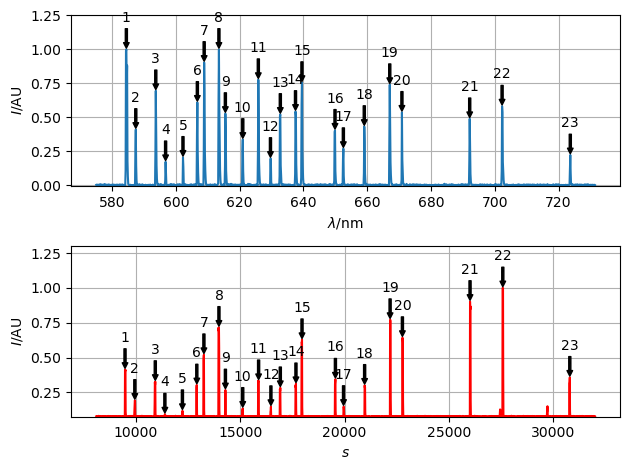

In [129]:
fig, (ax, ax2) = plt.subplots(2, 1)
ax.plot(lambdas_calib, intens_calib)
#ax.plot(lambdas[peak_indices], intens[peak_indices], "x")
for i, peak in enumerate(peak_indices, start=1):
    ax.annotate(str(i), (lambdas_calib[peak], intens_calib[peak]),
                textcoords="offset points", xytext=(0,20),
                ha='center', arrowprops=dict(facecolor='k', shrink=0.05, headwidth=4, headlength=4, width=1.5, hatch='O'))
ax.set(xlabel='$\\lambda / \\mathrm{nm}$', ylabel="$I / \\mathrm{AU}$", ylim=[min(intens_calib), 1.25])
ax.grid()

print([f'{l:.5}' for l in lambdas_calib[peak_indices]])


entire_spec_raw = np.loadtxt('data/entire_spec_neon.dat')

start_shift = 810
steps_stepper = entire_spec_raw[start_shift:, 0]
intens_stepper = entire_spec_raw[start_shift:, 1]
intens_stepper /= np.max(intens_stepper)
#ax2 = ax.twiny()
ax2.plot(steps_stepper, intens_stepper, c='r')


peak_indices_stepper = find_peaks(intens_stepper, prominence=0.01, distance=20)[0]
peak_indices_stepper = np.delete(peak_indices_stepper, 22)


labels = [1, 2, 3, ]

for i, peak in enumerate(peak_indices_stepper, start=1):
    ax2.annotate(str(i), (steps_stepper[peak], intens_stepper[peak]),
                 textcoords="offset points", xytext=(0, 20),
                 ha='center',
                 arrowprops=dict(facecolor='k', shrink=0.05, headwidth=4, headlength=4, width=1.5, hatch='O'))
ax2.grid()
ax2.set(xlabel="$s$", ylabel="$I / \\mathrm{AU}$", ylim =[min(intens_stepper), 1.3])
fig.tight_layout()
fig.savefig('out/course_calib')

In [130]:
ccd_background_raw = np.loadtxt('data/Spaltbreiten/0_4.dat')
ccd_background_pixel = ccd_background_raw[:, 0]
ccd_background_inten = ccd_background_raw[:, 1]

In [131]:
ccd_calib_raw = np.loadtxt('data/calib.dat')
ccd_pixel = ccd_calib_raw[:, 0]
ccd_inten = ccd_calib_raw[:, 1] #- ccd_background_inten
ccd_inten /= np.max(ccd_inten)

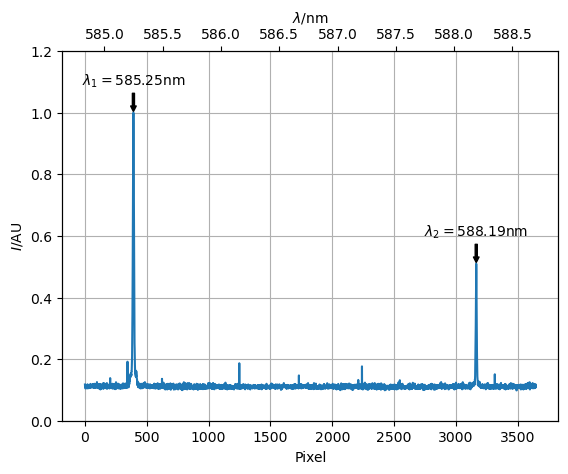

In [132]:
fig4, ax4 = plt.subplots()

peaks_ccd = find_peaks(ccd_inten, prominence=0.1, distance=20)[0]

steps = ccd_pixel[peaks_ccd]
lambdas = np.array([585.249, 588.190])

(slope, intercept) = np.polyfit(steps, lambdas, 1)

def pixel2lambda(pixel):
    return pixel * slope + intercept

ax4.plot(ccd_pixel, ccd_inten, lw=0)
ax4.set(xlabel="Pixel")

ax4.set(ylim=[0,1.2], ylabel="$I / \\mathrm{AU}$")

for i, peak in enumerate(peaks_ccd):
    ax4.annotate(f'$\\lambda_{i+1} = {lambdas[i]:.2f} \\mathrm{{nm}}$', (ccd_pixel[peak], ccd_inten[peak]),
                 textcoords="offset points", xytext=(0,20),
                 ha='center', arrowprops=dict(facecolor='k', shrink=0.05, headwidth=4, headlength=4, width=1.5, hatch='O'))

ax5 = ax4.twiny()
ax4.grid()
ax5.plot(pixel2lambda(ccd_pixel), ccd_inten)
ax5.set(xlabel="$\\lambda / \\mathrm{nm}$")

fig4.savefig('out/fine_calibration')

In [133]:
print(slope)

0.0010609668109668772
